<a href="https://colab.research.google.com/github/DefaDanuarta/Work-Life-Balance-XGBoost/blob/main/work_life_balance_with_baseModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#Importing data dari gdrive
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FINPRO/wellbeing.csv")
df = df.drop(columns=['Timestamp'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FRUITS_VEGGIES           15972 non-null  int64  
 1   DAILY_STRESS             15972 non-null  object 
 2   PLACES_VISITED           15972 non-null  int64  
 3   CORE_CIRCLE              15972 non-null  int64  
 4   SUPPORTING_OTHERS        15972 non-null  int64  
 5   SOCIAL_NETWORK           15972 non-null  int64  
 6   ACHIEVEMENT              15972 non-null  int64  
 7   DONATION                 15972 non-null  int64  
 8   BMI_RANGE                15972 non-null  int64  
 9   TODO_COMPLETED           15972 non-null  int64  
 10  FLOW                     15972 non-null  int64  
 11  DAILY_STEPS              15972 non-null  int64  
 12  LIVE_VISION              15972 non-null  int64  
 13  SLEEP_HOURS              15972 non-null  int64  
 14  LOST_VACATION         

In [ ]:
print(f"Unique values in 'gender' column: {df['GENDER'].unique()}")
print(f"Unique values in 'age' column: {df['AGE'].unique()}")

Unique values in 'gender' column: ['Female' 'Male']
Unique values in 'age' column: ['36 to 50' '51 or more' '21 to 35' 'Less than 20']


In [ ]:
#checking null value
print(f"Null values : \n{df.isnull().sum()}")

Null values : 
FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64


# **Bersihkan data dari yang hilang dan duplikasi**


In [ ]:
print(f"Duplicated values : {df.duplicated().sum()}")
df.drop_duplicates(inplace = True)
print(f"Duplicated values : {df.duplicated().sum()}")

Duplicated values : 683
Duplicated values : 0


In [ ]:
print(df['AGE'].head())
df['AGE'].unique()

0      36 to 50
1      36 to 50
2      36 to 50
3    51 or more
4    51 or more
Name: AGE, dtype: object


array(['36 to 50', '51 or more', '21 to 35', 'Less than 20'], dtype=object)

**Kita encoding dlu si agenya karena dia masi kategori**

---

In [ ]:
# Encoding AGE
Le = LabelEncoder()
df['AGE'] = Le.fit_transform(df['AGE'])
df['GENDER'] = Le.fit_transform(df['GENDER'])
df.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,2,2,5,0,5,2,0,1,6,...,7,5,5,1,4,0,5,1,0,609.5
1,2,3,4,3,8,10,5,2,2,5,...,8,2,2,2,3,2,6,1,0,655.6
2,2,3,3,4,4,10,3,2,2,2,...,8,10,2,2,4,8,3,1,0,631.6
3,3,3,10,3,10,7,2,5,2,3,...,5,7,5,1,5,2,0,2,0,622.7
4,5,1,3,3,10,4,2,4,2,5,...,7,0,0,2,8,1,5,2,0,663.9


In [ ]:
df['AGE'].head()

,AGE
0,1
1,1
2,1
3,2
4,2


In [ ]:
print(f"Range of 'FRUITS_VEGGIES' column: {df['FRUITS_VEGGIES'].min()} to {df['FRUITS_VEGGIES'].max()}")
print(f"Number of unique values in 'AGE' column after encoding: {df['FRUITS_VEGGIES'].unique()}")

Range of 'FRUITS_VEGGIES' column: 0 to 5
Number of unique values in 'AGE' column after encoding: [3 2 5 4 1 0]


**Cek dan ubah si data type jadi numerik semua**

---

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15289 entries, 0 to 15971
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FRUITS_VEGGIES           15289 non-null  int64  
 1   DAILY_STRESS             15289 non-null  object 
 2   PLACES_VISITED           15289 non-null  int64  
 3   CORE_CIRCLE              15289 non-null  int64  
 4   SUPPORTING_OTHERS        15289 non-null  int64  
 5   SOCIAL_NETWORK           15289 non-null  int64  
 6   ACHIEVEMENT              15289 non-null  int64  
 7   DONATION                 15289 non-null  int64  
 8   BMI_RANGE                15289 non-null  int64  
 9   TODO_COMPLETED           15289 non-null  int64  
 10  FLOW                     15289 non-null  int64  
 11  DAILY_STEPS              15289 non-null  int64  
 12  LIVE_VISION              15289 non-null  int64  
 13  SLEEP_HOURS              15289 non-null  int64  
 14  LOST_VACATION            15

**Di daily stress itu ada object karena ada data yang 1/1/100**

---

In [ ]:
# Ganti nilai tak valid jadi NaN
df['DAILY_STRESS'] = pd.to_numeric(df['DAILY_STRESS'], errors='coerce')
# Cek apakah masih ada NaN (karena input salah)
print(df['DAILY_STRESS'].isna().sum())
# (Opsional) Hapus baris yang stress-nya NaN
df = df.dropna(subset=['DAILY_STRESS'])
# Pastikan tipe data sudah numerik
print(df.dtypes)

1
FRUITS_VEGGIES               int64
DAILY_STRESS               float64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                          int64
GENDER                       int64
WORK_LIFE_BALANCE_SCORE    float64
dtype: object


# **EDA**

[link text](https://)**Checking Corelation matrix**

---

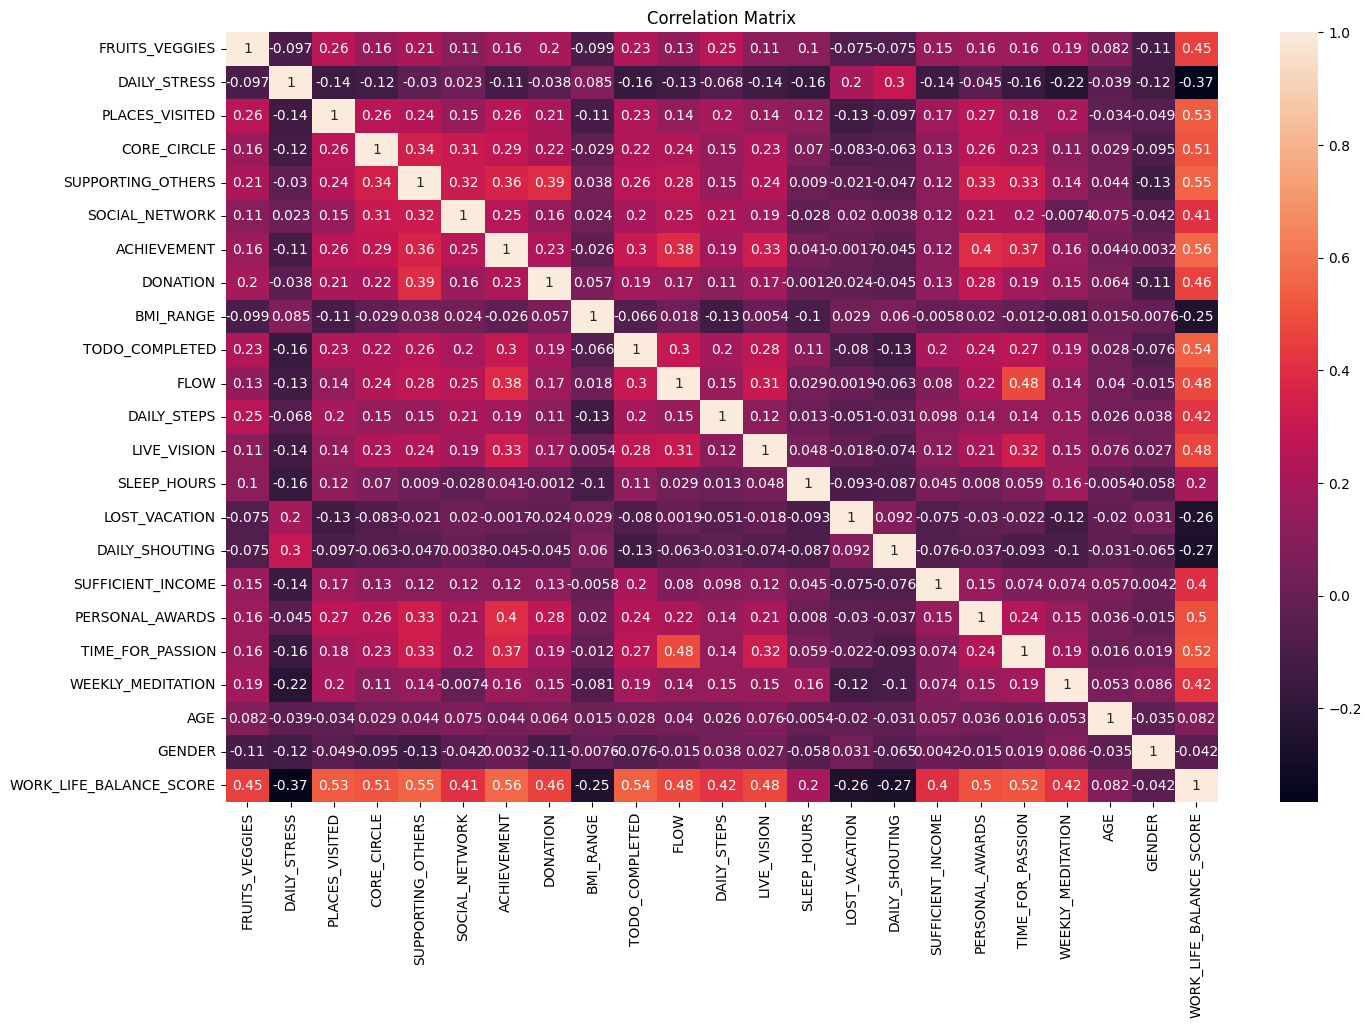

In [ ]:
# Correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

**Persebaran data di semua variabel**

---

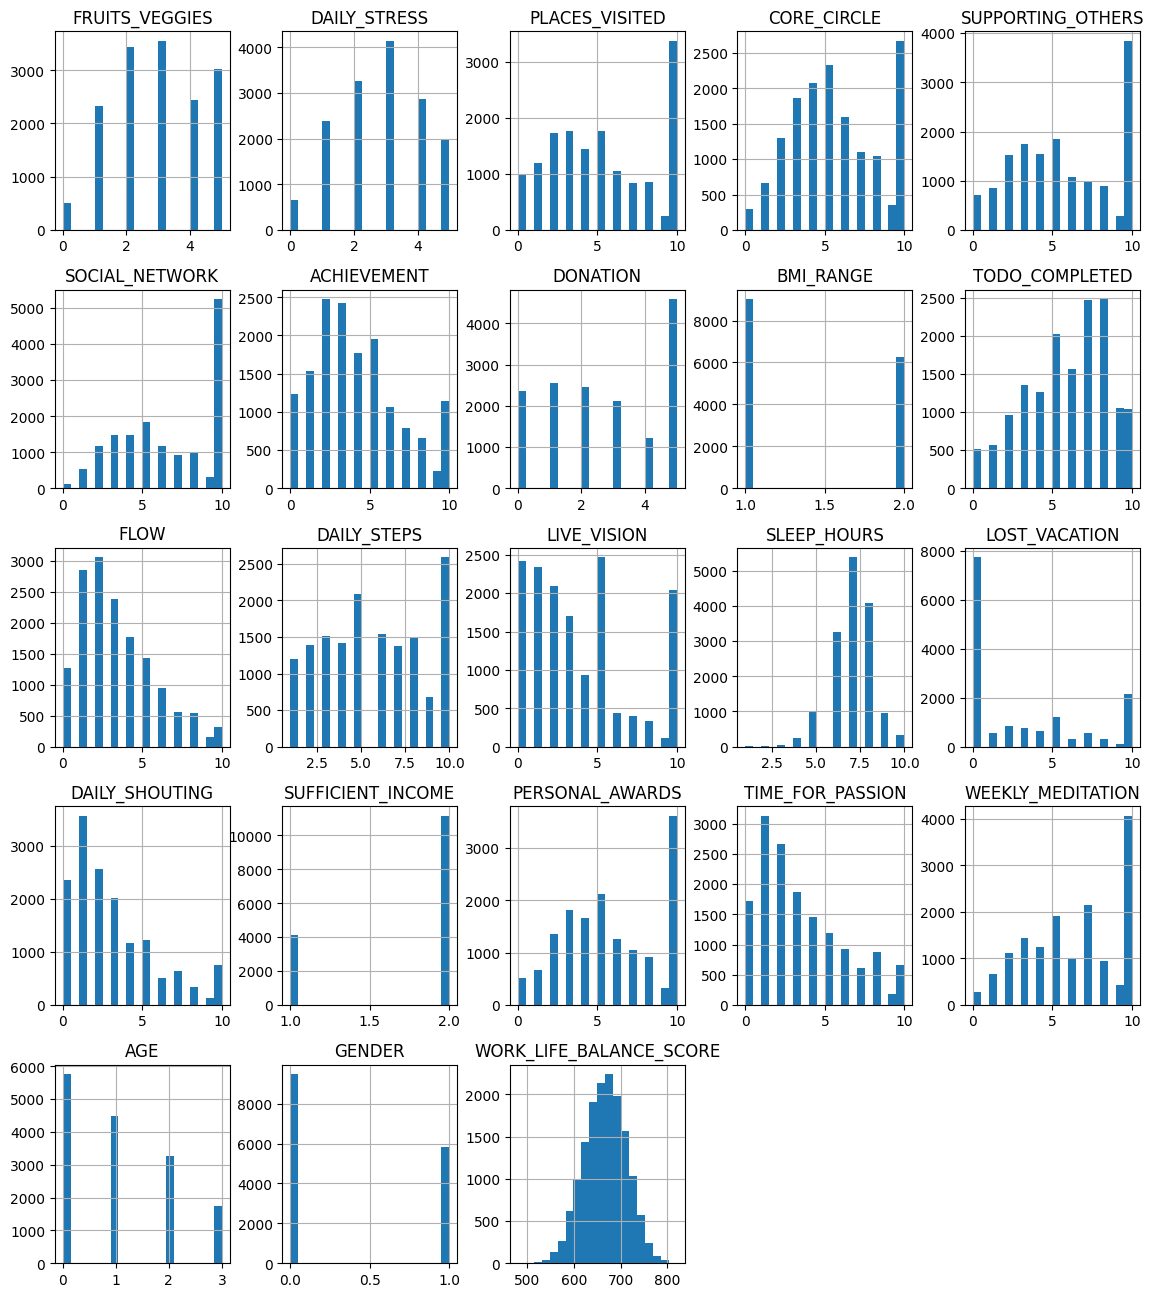

In [ ]:
df.hist(bins=20, figsize=(14,16))
plt.show()

**Cek Outlier di setiap variable**

---

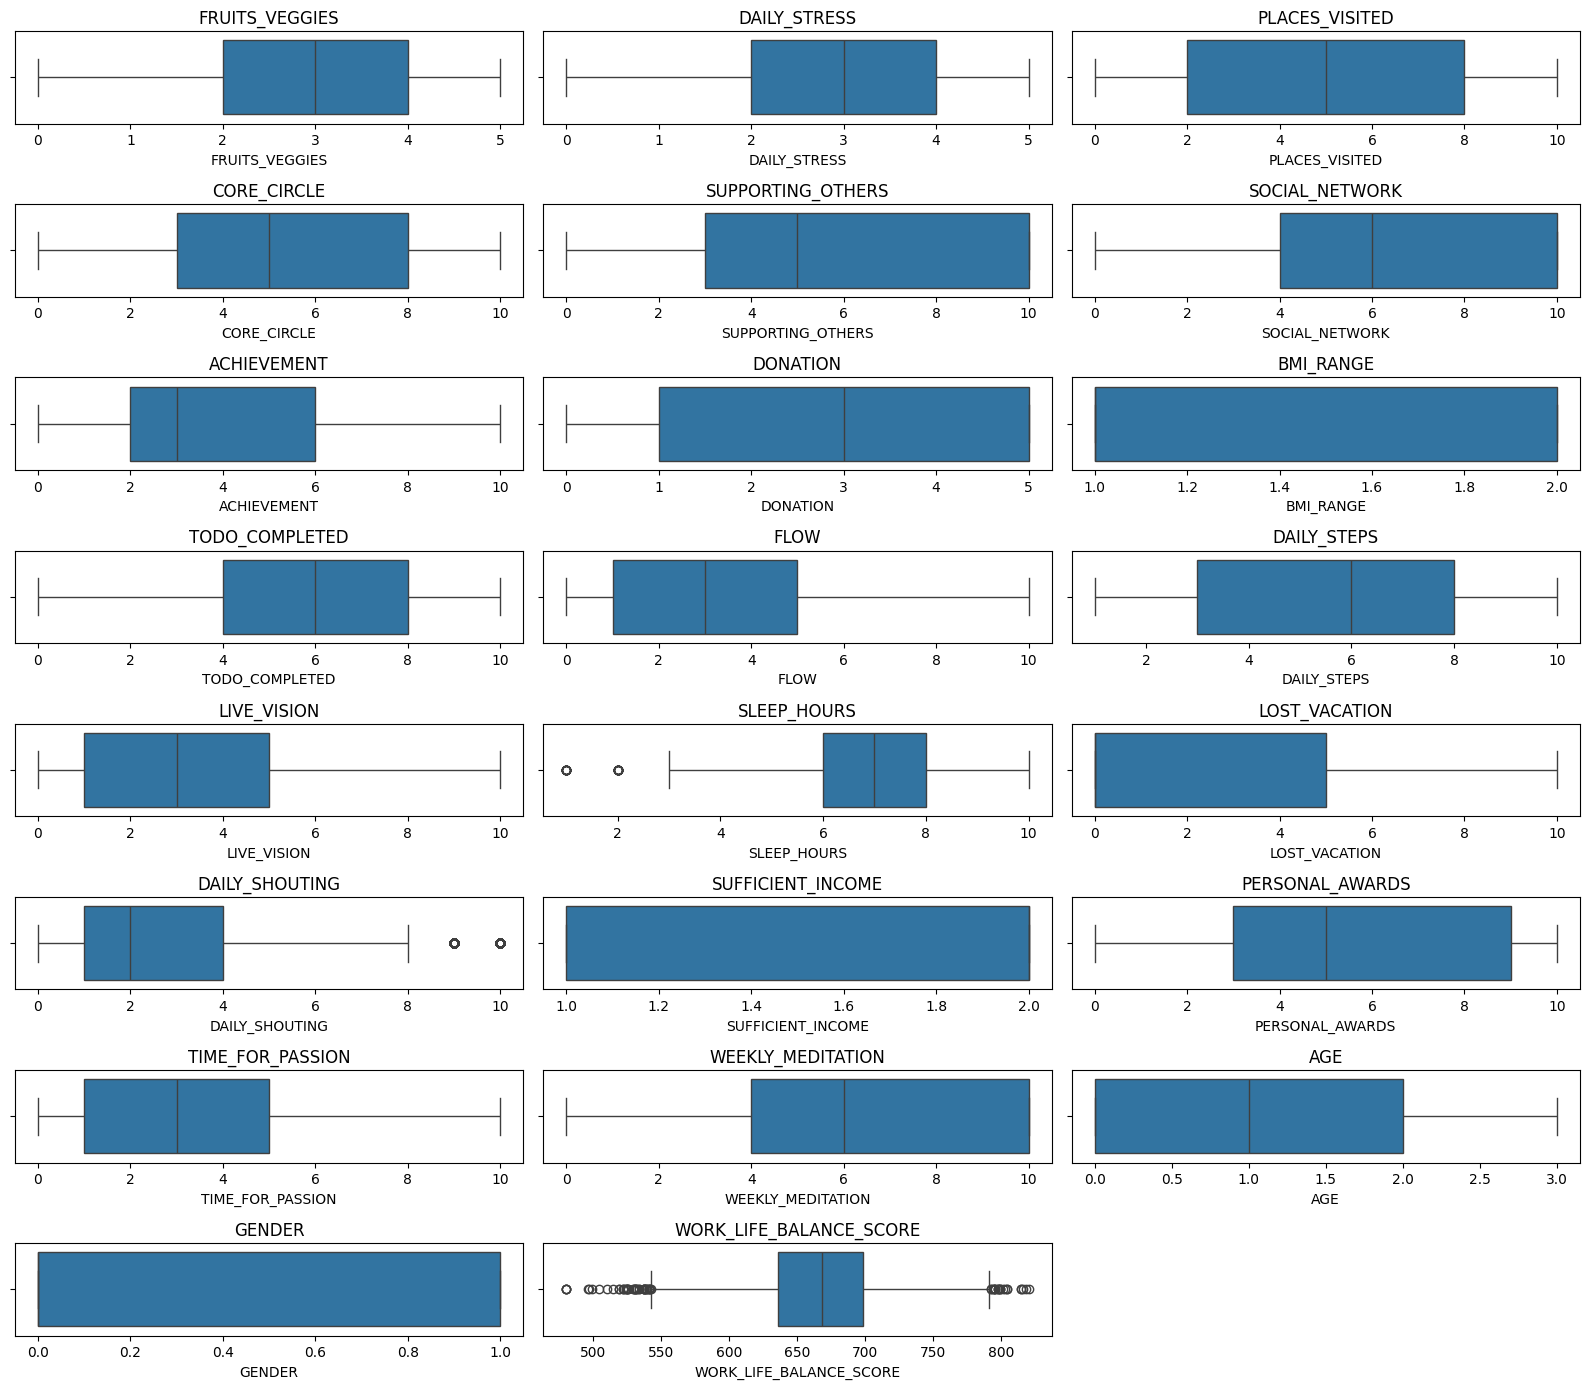

In [ ]:
# Ambil hanya kolom numerik
numeric_cols = df.select_dtypes(include=np.number).columns

# Set ukuran layout otomatis
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))


plt.figure(figsize=(16, 14))
for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# **Preprocessing : Ngurus Skewness**

**Cek Skewness semua variable**

---


In [ ]:
df.skew()

,0
FRUITS_VEGGIES,-0.045845
DAILY_STRESS,-0.083000
PLACES_VISITED,0.178624
CORE_CIRCLE,0.202465
SUPPORTING_OTHERS,0.053906
SOCIAL_NETWORK,-0.185888
ACHIEVEMENT,0.631192
DONATION,-0.048476
BMI_RANGE,0.367135
TODO_COMPLETED,-0.361182


**Ditemukan skewness di ACHIEVEMENT	FLOW	LIVE_VISION LOST_VACATION DAILY_SHOUTING	SUFFICIENT_INCOME	TIME_FOR_PASSION**

---

**Normalisasi pake Yeo-johnson**

In [ ]:
col_to_normalize = ['ACHIEVEMENT', 'FLOW', 'LIVE_VISION', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'TIME_FOR_PASSION']

pt = PowerTransformer()
df[col_to_normalize] = pt.fit_transform(df[col_to_normalize])
df[col_to_normalize].skew()

,0
ACHIEVEMENT,-0.054825
FLOW,-0.028447
LIVE_VISION,-0.056278
LOST_VACATION,0.247237
DAILY_SHOUTING,-0.008396
SUFFICIENT_INCOME,-1.037638
TIME_FOR_PASSION,-0.032194


**Distribusi Sesudah urus skew**

---

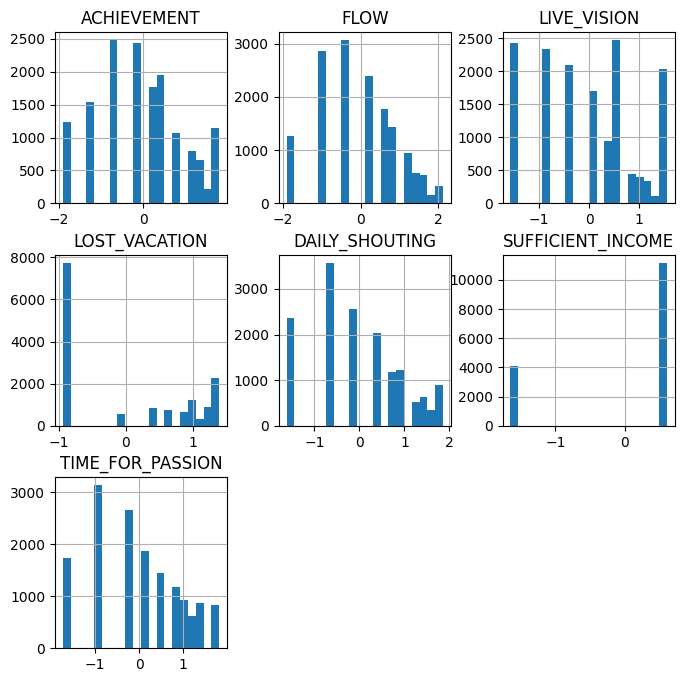

In [ ]:
col_to_normalize = ['ACHIEVEMENT', 'FLOW', 'LIVE_VISION', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'TIME_FOR_PASSION']
df[col_to_normalize].hist(bins=20, figsize=(8,8))
plt.show()

In [ ]:
print(df.head())

   FRUITS_VEGGIES  DAILY_STRESS  PLACES_VISITED  CORE_CIRCLE  \
0               3           2.0               2            5   
1               2           3.0               4            3   
2               2           3.0               3            4   
3               3           3.0              10            3   
4               5           1.0               3            3   

   SUPPORTING_OTHERS  SOCIAL_NETWORK  ACHIEVEMENT  DONATION  BMI_RANGE  \
0                  0               5    -0.641927         0          1   
1                  8              10     0.499596         2          2   
2                  4              10    -0.207006         2          2   
3                 10               7    -0.641927         5          2   
4                 10               4    -0.641927         4          2   

   TODO_COMPLETED  ...  SLEEP_HOURS  LOST_VACATION  DAILY_SHOUTING  \
0               6  ...            7       1.006945        0.945564   
1               5  ...        

# **Preprocessing : Splitting Data dan scalling**


**Scaling dilakukan setelah splitting untuk cegah leakage**

---

In [ ]:
x = df.drop('WORK_LIFE_BALANCE_SCORE', axis = 1)
y = df['WORK_LIFE_BALANCE_SCORE']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=42)

print("Jumlah Test : ", len(x_test))
print("Jumlah Train : ", len(x_train))

Jumlah Test :  4587
Jumlah Train :  10701


**Scalling**

---

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)  # pakai transform, bukan fit_transform!

# **Modeling : linear regression**

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 2.98
MSE: 13.88
R² Score: 0.99


**Scatter Plot: y_test vs y_pred**

---

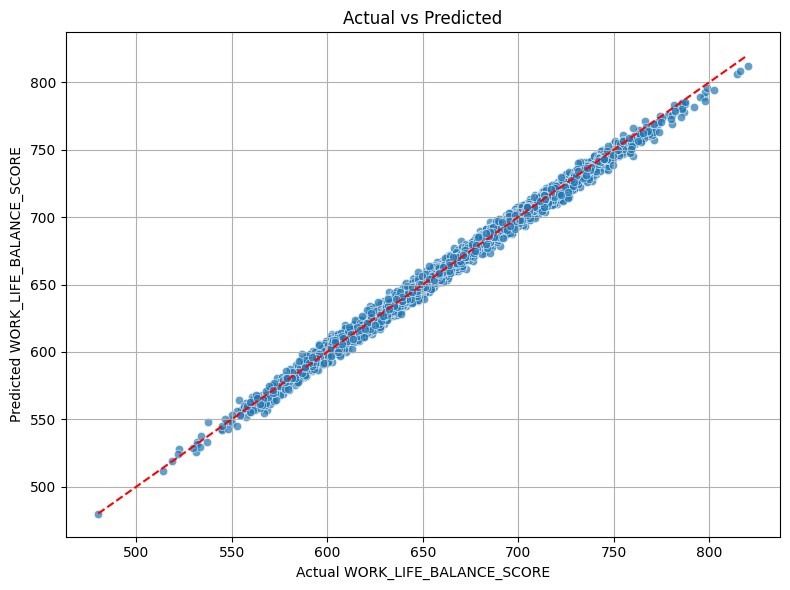

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual WORK_LIFE_BALANCE_SCORE")
plt.ylabel("Predicted WORK_LIFE_BALANCE_SCORE")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # garis ideal
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate training and testing R-squared scores
train_r2 = r2_score(y_train, model.predict(X_train_scaled))
test_r2 = r2_score(y_test, y_pred)

print(f"Training R² Score: {train_r2:.2f}")
print(f"Testing R² Score: {test_r2:.2f}")

# Check for overfitting
if abs(train_r2 - test_r2) > 0.1:
    print("Warning: Potential overfitting detected. The difference between training and testing R-squared scores is significant.")
elif train_r2 < test_r2:
    print("Possible underfitting.")
else:
  print("The model seems to generalize well.")


Training R² Score: 0.99
Testing R² Score: 0.99
Possible underfitting.


**Histogram: Distribusi Error (Residuals)**

---

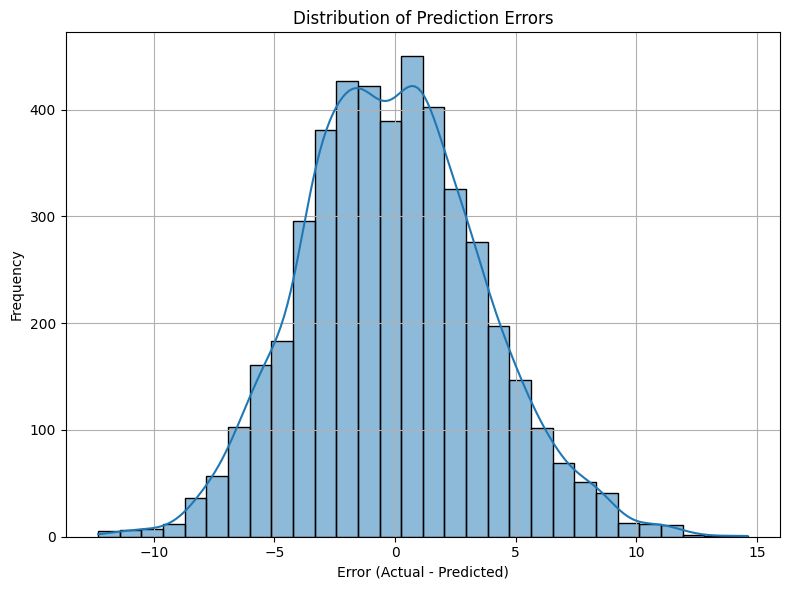

In [ ]:
errors = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

**Residual Plot**

---

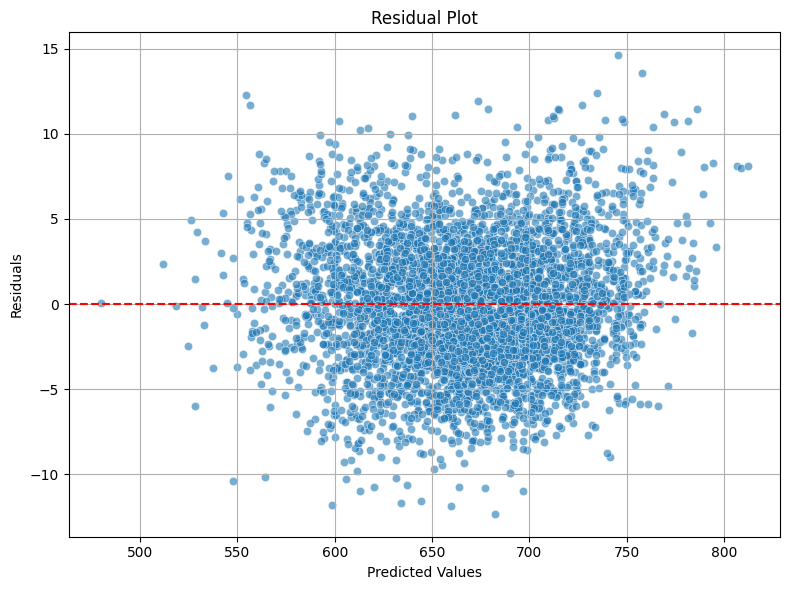

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=errors, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()